In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
df = pd.read_excel('편의점.xlsx', header=0, index_col=0, squeeze=True)

In [4]:
weather = pd.read_excel('weather.xlsx')

In [5]:
la = pd.read_excel('랄라블라.xlsx')

In [6]:
final = pd.read_excel('총판매량.xlsx', header=0, index_col=0, squeeze=True)

In [20]:
final.head()

일시
2016-01-01    202894
2016-01-02    180455
2016-01-03    174814
2016-01-04    151354
2016-01-05    154348
Name: 총합, dtype: int64

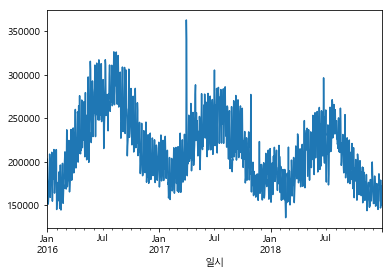

In [7]:
final.plot()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


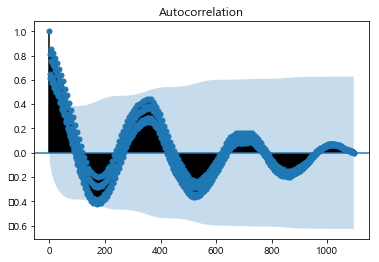

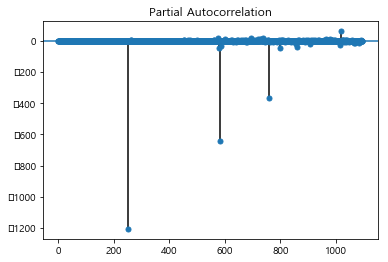

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(final)
plot_pacf(final)
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


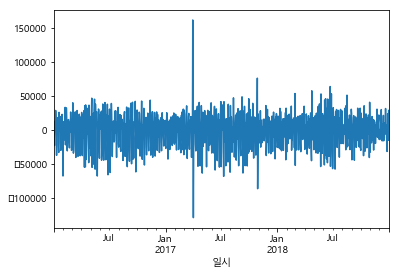

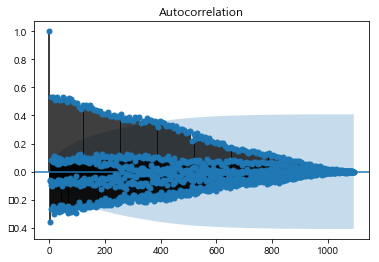

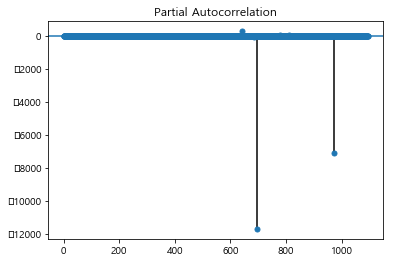

In [9]:
diff_1=final.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [21]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(final, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.총합   No. Observations:                 1095
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -12539.913
Method:                       css-mle   S.D. of innovations          22753.028
Date:                Mon, 15 Jul 2019   AIC                          25085.826
Time:                        21:15:53   BIC                          25100.822
Sample:                    01-02-2016   HQIC                         25091.501
                         - 12-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.0231    104.129     -0.135      0.893    -218.112     190.066
ma.L1.D.총합    -0.8493      0.016    -53.432      0.000      -0.880      -0.818
                                    Roots           

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [16]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(final, order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.총합   No. Observations:                 1095
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -12539.922
Method:                       css-mle   S.D. of innovations          22753.204
Date:                Mon, 15 Jul 2019   AIC                          25083.843
Time:                        21:03:15   BIC                          25093.840
Sample:                    01-02-2016   HQIC                         25087.626
                         - 12-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D.총합    -0.8493      0.016    -53.429      0.000      -0.880      -0.818
                                    Roots                                    
                  Real          Imaginary           M

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


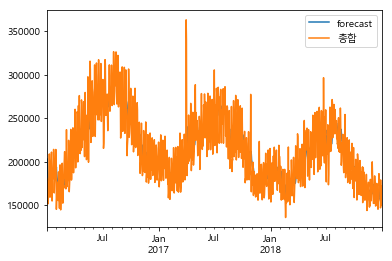

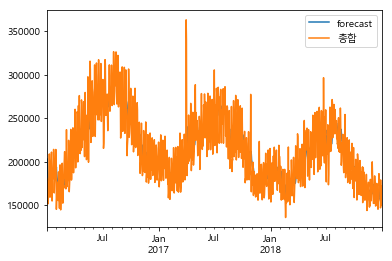

In [22]:
model_fit.plot_predict()

In [23]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([164486.44434705]), array([22753.02800617]), array([[119891.32891573, 209081.55977836]]))


In [19]:
# 위 코드의 결과는 아래와 같은데, 순서대로 예측값, stderr, upper bound, lower bound 이다.
# (array([ 15061.16108756]), array([ 508.66521867]), array([[ 14064.19557878], [ 13303.94590548]]))
# 즉, 가장 즁요한 예측값은 15061달러인데, 학습에 쓰인 데이터가 12월 9일까지이므로, ARIMA모형은 12월 10일의 비트코인 가격을 15,061달러로 예측하였다.